# The Complex Circle Problem 

Consider a circle of radius one centered at the origin of a complex plane. Given an integer $n$ and an angle $\theta_0$, how can we determine the product of the $n$ complex numbers $z_1, \dots, z_{n}$ that represent the $n$ equal parts into which the circle is divided, considering all possible rotations of these parts by angle $\theta_0$?

**Note:** let $\theta_0$ be the angle between the *x-axis* to the last complex number $z_{n}$. This means that, when $\theta_0 = 0$, $z_{n} = 1 + 0i$.

## Example

As an example, let $n = 4$ and consider two different values of $\theta_0$: $0$ and $0.5$.

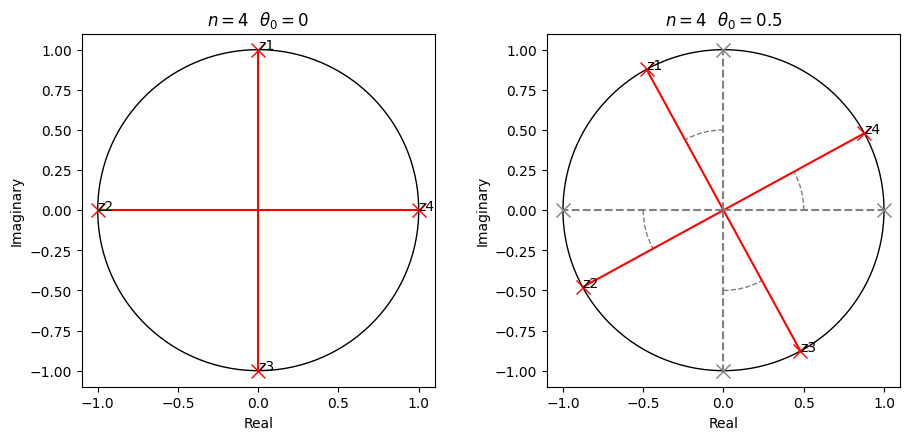

In [2]:
from src import visualize, ComplexCircle

visualize(
    ComplexCircle(n=4, theta0=0),
    ComplexCircle(n=4, theta0=0.5),
    show_result=False,
    show_angles=True
)

As shown above, when we increase $\theta_0$ by $0.5$, $z_0, z_1, z_2, z_3$ are rotated $0.5$ radians anticlockwise.

## Solution

To find the product of the $n$ complex numbers $z_1, z_2, \dots, z_{n}$, we can first find the polar form of each complex number, that is

$$z_k = r_k e^{i \theta_k}, k \in \{1,2,\dots,n\}$$

We know that all the complex numbers live on the unit circle circumference

$$r_k = 1$$

and that their angles are equally spaced

$$\theta_k = \theta_{k-1} + \Delta \theta = \theta_{k-1} + \frac{2\pi}{n}$$

Because we defined $\theta_0$ to be the angle between the *x-axis* to the last complex number $z_{n}$, we can deduce that

$$\theta_k = k \cdot \Delta \theta + \theta_0$$

Then, the product of $z_1, z_2, \dots, z_{n}$ is 

$$
\begin{align*}
P_{n\theta_0} &= 
\prod_{k=1}^{n} e^{i (k \Delta \theta + \theta_0)}
= \prod_{k=1}^{n} e^{i k \Delta \theta} e^{i \theta_0}
\\
&= e^{i \theta_0 n} \prod_{k=1}^{n} e^{i k \Delta \theta} 
= e^{i \theta_0 n} e^{i \Delta \theta \sum_{k=1}^{n} k}
\\
&= e^{i \theta_0 n} e^{i \Delta \theta{n(n+1)\over 2}}
= e^{i \theta_0 n} e^{i \pi (n+1)}
\\
\\
\therefore P_{n\theta_0} &= e^{i [\pi (n+1) + \theta_0 n]} 
= e^{i [n(\pi + \theta_0) + \pi]}
\end{align*}
$$

This means that the resulting complex number $P_{n\theta_0}$ has a norm of $r = 1$ and an angle of $\theta=n(\pi + \theta_0) + \pi$.

## $\theta(n)$ function

Since $P_{n \theta_0}$ is always a complex number sitting on the unit circle, we can completely describe it with its angle $\theta$

$$
P_{n \theta_0} = e^{i\theta}
$$

What is interesting to analyze is how $P_{n \theta_0}$ angle $\theta$ changes when we increase the number of complex numbers $n$ for a fixed initial rotation $\theta_0$. To do this we define the $\theta(n)$ function.

### Definition

The function $\theta(n)$ returns the angle $\theta$ of the resulting complex number $P_{n \theta_0}$ for the *complex circle problem* with $n$ complex numbers and an initial rotation $\theta_0$.

$$
\begin{align*}
\theta &: \mathbb{N} \to \mathbb{R}\\
\theta(n) &= n(\pi + \theta_0) + \pi
\end{align*}
$$

### Rotation Property

Increasing $n$ by one unit rotates $P_{n\theta_0}$ by an angle $\Delta \theta = \theta_0 + \pi$.

#### Demonstration

To find how $\theta(n)$ changes when $n$ is increased by one unit, we can calculate $\Delta \theta$

$$
\begin{align*}
\Delta \theta &= \theta(n+1) - \theta(n)\\
\Delta \theta &= (n+1)(\pi + \theta_0) + \pi - n(\pi + \theta_0) - \pi\\
\therefore \Delta \theta &= \pi + \theta_0
\end{align*}
$$

#### Defining $\theta(n)$ in terms of $\Delta \theta$

$\theta(n)$ can be defined recursively in terms of $\Delta \theta$. Let $u = n-1, n \in \mathbb{N}$

$$
\begin{align*}
\Delta \theta &= \theta(u+1) - \theta(u)\\
\theta(u+1) &= \theta(u) + \Delta \theta\\
\theta(n-1+1) &= \theta(n-1) + \Delta \theta\\
\therefore \theta(n) &= \theta(n-1) + \Delta \theta
\end{align*}
$$

Since $\theta(1) = \theta_0 + 2\pi = \theta_0$

$$
\begin{align*}
\theta(1) &= \theta_0\\
\theta(2) &= \theta(1) + \Delta \theta = \theta_0 + \Delta \theta\\
\theta(3) &= \theta(2) + \Delta \theta = \theta_0 + 2 \Delta \theta\\
\theta(4) &= \theta(3) + \Delta \theta = \theta_0 + 3 \Delta \theta\\
\vdots\\
\theta(n) &= \theta(n-1) + \Delta \theta = \theta_0 + (n-1) \Delta \theta\\
\therefore \theta(n) &= \theta_0 + (n-1) \Delta \theta\\
\\
\end{align*}
$$

#### Exercise

Find a value for $\theta_0$ such that $P_{n\theta_0}$ rotates $\frac{\pi}{2}$ radians anticlockwise when we increase $n$ by one unit.

##### Solution

$P_{n\theta_0}$ to rotate $\frac{\pi}{2}$ when $n$ is increased by one unit means that $\Delta \theta = \frac{\pi}{2}$, thus

$$
\begin{align*}
\Delta \theta &= \frac{\pi}{2}
\\
\pi + \theta_0 &= \frac{\pi}{2}
\\
\theta_0 &= -\frac{\pi}{2}
\end{align*}
$$

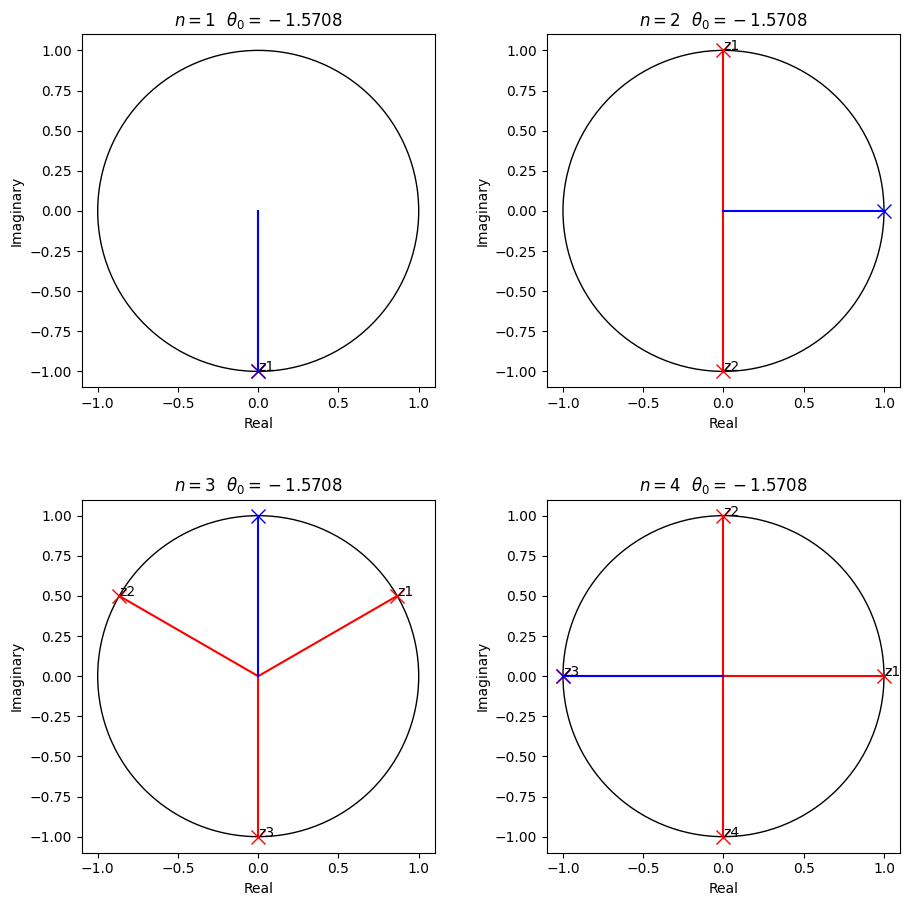

In [4]:
from math import pi

visualize(
    ComplexCircle(n=1, theta0=-pi/2),
    ComplexCircle(n=2, theta0=-pi/2),
    ComplexCircle(n=3, theta0=-pi/2),
    ComplexCircle(n=4, theta0=-pi/2),
    show_result=True,
    show_angles=False
)

Note that the resulting complex number $P_{n\theta_0}$ is plotted in blue.

### Sum Property

The sum of the arguments of the $N$ resulting complex number $P_{n_k\theta_0}$ for a set of $N$ positive integers ${n_1, n_2, \cdots, n_N}$ with a fixed initial rotation $\theta_0$ is

$$
\sum_{k=1}^{N} \theta(n_k) = -\pi N + \Delta \theta \sum_{k=1}^{N} n_k
$$

#### Demonstration

Given a set of positive integers ${n_1, n_2, \cdots, n_N}$ and an initial angle $\theta_0$

$$
\begin{align*}
\sum_{k=1}^{N} \theta(n_k) &= \sum_{k=1}^{N} \theta_0 + (n_k - 1) \Delta \theta\\
&= N \theta_0 + \Delta \theta(-N + \sum_{k=1}^{N} n_k)\\
&= N (\theta_0 - \Delta \theta) + \Delta \theta \sum_{k=1}^{N} n_k\\
&= -\pi N + \Delta \theta \sum_{k=1}^{N} n_k\\
\therefore  \sum_{k=1}^{N} \theta(n_k) &= -\pi N + \Delta \theta \sum_{k=1}^{N} n_k
\end{align*}
$$

### Corollary

The sum of the arguments of the $N$ resulting complex number $P_{n_k\theta_0}$ for a set of $N$ positive integers ${n_1, n_2, \cdots, n_N}$ with a fixed initial rotation $\theta_0 = -\pi N$ is

$$
\sum_{k=1}^{N} \theta(n_k) = \theta(1 + \sum_{k=1}^{N} n_k)
$$

#### Demonstration

Given a set of $N$ positive integers ${n_1, n_2, \cdots, n_N}$ and an initial angle $\theta_0 = -\pi N$

$$
\begin{align*}
\sum_{k=1}^{N} \theta(n_k) &= -\pi N + \Delta \theta \sum_{k=1}^{N} n_k \\
&= \theta_0 + \Delta \theta \sum_{k=1}^{N} n_k = \theta_0 + \Delta \theta (1 - 1 + \sum_{k=1}^{N} n_k) \\
&= \theta_0 + \Delta \theta [(1 + \sum_{k=1}^{N} n_k) - 1] = \theta(1 + \sum_{k=1}^{N} n_k)\\
\therefore \sum_{k=1}^{N} \theta(n_k) &= \theta(1 + \sum_{k=1}^{N} n_k)
\end{align*}
$$
